<a href="https://colab.research.google.com/github/mqquiroz/ICH3424/blob/master/Quintero_Refdif1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [59]:
!git clone https://github.com/mqquiroz/Refdif1.git
%cd Refdif1/
!make all
%cd ..
!mkdir modelo_REFDIF
%cd Refdif1/
%cp -r 'datgen' 'refdif1' 'surface' '/content/modelo_REFDIF'
%cd ..
!rm -r Refdif1
%cd modelo_REFDIF
!chmod +x datgen refdif1 surface
#!chmod +rx ./datgen ./refdif1 ./surface
import os
cwd = os.getcwd()
os.environ['PATH'] += ":"+cwd
%cd ..

Cloning into 'Refdif1'...
remote: Enumerating objects: 26, done.
remote: Counting objects: 100% (26/26), done.
remote: Compressing objects: 100% (24/24), done.
remote: Total 26 (delta 5), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (26/26), done.
/content/Refdif1
gfortran -std=legacy -c -O refdif1v25.f
refdif1v25.f:635:0:

      &(j)+dir(ifreq,i+1)))*2.
 
refdif1v25.f:633:0:

       do 6 i=1,nn
 
note: within this loop
refdif1v25.f:629:0:

       dir(ifreq,ip1)=2.*pi*seed/100.
 
refdif1v25.f:626:0:

       do 5 i=1,nn
 
note: within this loop
refdif1v25.f:624:0:

      &p)+cos(thi(i)-dth/2.)**(2*nsp))
 
refdif1v25.f:619:0:

       do 4 i=1,nn
 
note: within this loop
gfortran -std=legacy -c -O infile1.f
gfortran -std=legacy -o refdif1 refdif1v25.o infile1.o 
gfortran -std=legacy -c -O datgenv25.f
gfortran -std=legacy -o datgen datgenv25.o infile1.o
gfortran -std=legacy -c -O surface.f
gfortran -std=legacy -o surface surface.o
/content
/content/Refdif1
/content
/content/mo

In [83]:
!datgen

 ***********  parabolic model in rectangular grid  **********

 input type of bottom desired

 1=surface piercing island
 2=bbr, submerged shoal
 3=arthur rip current
 4=test case, planar bottom
 5=radder(1979), configuration 2
 6=grazing incidence on linear caustic
 7=whalin's channel
 8=surface piercing breakwater
 9=channel
10=breakwater
4
  input m,n,dx,dy,depth,period
120,120,50,50,100,8
  input bottom slope
0.02
  do you want to create indat.dat? yes=1
1
  input iu: 1=mks, 2=english
1
  input dispersion relationship; ntype: 0=linear,
                           1=composite, 2=stokes
0
  input lateral boundary condition; ibc: 0=closed
                                         1=open
1
 input ispace (0=program picks x spacing, 1=user choses)
0
  input nd (# y divisions, 1 is minimum)
1
 input if(1) turbulent, if(2) porous, if(3) laminar
   standard  choice:  1, 0, 0
0,0,0
 input isp (subgrid features) :standard  0
0
 input values of iinput, ioutput:
 iinput: 1 standard, i.e., not sta

In [141]:
import numpy as np
import matplotlib.pyplot as plt

In [142]:
#Grilla = np.genfromtxt('refdat.dat')#,filling_values=np.nan)
Grilla = np.genfromtxt('quintero.dat')
print(np.shape(Grilla))

mr = 120
nr = 120

DXR = 50.0
DYR = 50.0

xp = np.linspace(5,495+5,mr)
#xp = np.linspace(495+5,5,mr)

#xp = np.linspace(495+5,0,nx)
y  = np.linspace(-(495+5)/2,(495+5)/2,nr)
#y  = np.linspace(495/2,-495/2,ny)

X,Y = np.meshgrid(xp,y)

h = 0.02*X
print(np.max(h))

print(np.shape(Grilla))

#Depth = Grilla[:500,:]
#Depth = Depth.reshape(100,100)
#np.max(Depth)

Depth = Grilla.reshape(120,120)
print(np.shape(Depth))

(720, 20)
10.0
(720, 20)
(120, 120)


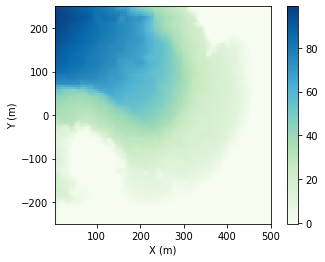

In [143]:
plt.pcolormesh(X,Y,Depth.T,cmap='GnBu')
plt.colorbar()
plt.gca().set_aspect('equal')
plt.xlabel('X (m)')
plt.ylabel('Y (m)')
plt.show()

In [154]:
!refdif1

Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG


120 120
[   0.   50.  100.  150.  200.  250.  300.  350.  400.  450.  500.  550.
  600.  650.  700.  750.  800.  850.  900.  950. 1000. 1050. 1100. 1150.
 1200. 1250. 1300. 1350. 1400. 1450. 1500. 1550. 1600. 1650. 1700. 1750.
 1800. 1850. 1900. 1950. 2000. 2050. 2100. 2150. 2200. 2250. 2300. 2350.
 2400. 2450. 2500. 2550. 2600. 2650. 2700. 2750. 2800. 2850. 2900. 2950.
 3000. 3050. 3100. 3150. 3200. 3250. 3300. 3350. 3400. 3450. 3500. 3550.
 3600. 3650. 3700. 3750. 3800. 3850. 3900. 3950. 4000. 4050. 4100. 4150.
 4200. 4250. 4300. 4350. 4400. 4450. 4500. 4550. 4600. 4650. 4700. 4750.
 4800. 4850. 4900. 4950. 5000. 5050. 5100. 5150. 5200. 5250. 5300. 5350.
 5400. 5450. 5500. 5550. 5600. 5650. 5700. 5750. 5800. 5850. 5900. 5950.]


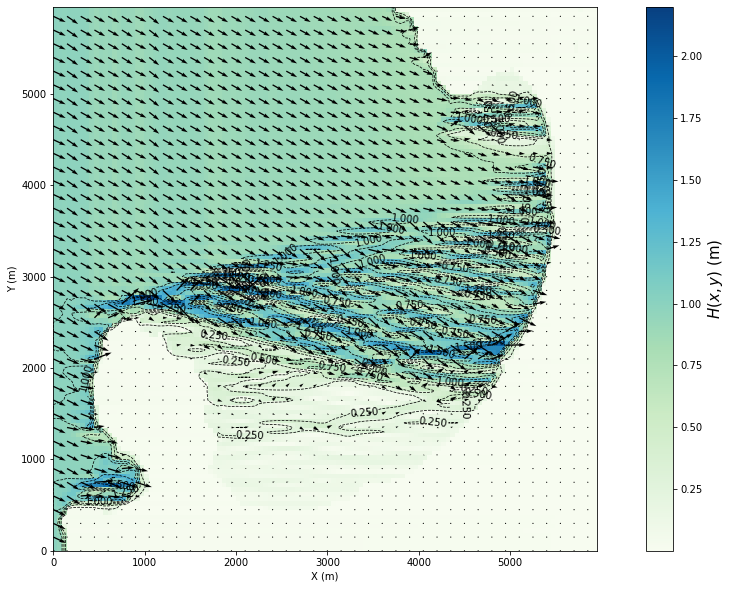

In [167]:
h     = np.loadtxt('depth.dat')
H     = np.loadtxt('height.dat')
angle = np.loadtxt('angle.dat')
nx,ny = np.shape(h)
print(nx,ny)

x = DXR*np.arange(1,nx+1)-DXR
y = DYR*np.arange(1,ny+1)-DYR
#y  = np.linspace(-495/2,495/2,ny)
print(y)

X,Y = np.meshgrid(x,y)


DX = H*np.cos(np.pi*angle/180)
DY = H*np.sin(np.pi*angle/180)

nd = 3

alto  = 10
ancho = 17.5
fig = plt.figure(figsize=(ancho, alto))

plt.pcolormesh(X,Y,H.T,cmap='GnBu')
cbar = plt.colorbar()
cbar.ax.set_ylabel('$H (x,y)$ (m)',fontsize=15)
CS = plt.contour(X,Y,H.T,levels=[0.25,0.5,0.75,1.0,1.25,1.5],colors='k',linewidths=0.75,linestyles='dashed')
plt.clabel(CS, CS.levels, inline=True, fontsize=10)

plt.quiver(X[::nd,::nd],Y[::nd,::nd],DX.T[::nd,::nd],DY.T[::nd,::nd])
plt.gca().set_aspect('equal')
#plt.xlim(0,495)
plt.xlabel('X (m)')
plt.ylabel('Y (m)')
plt.show()

0.001


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: UserWarning: No contour levels were found within the data range.
  after removing the cwd from sys.path.


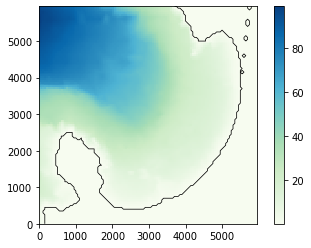

In [166]:
print(np.min(h))
plt.pcolormesh(X,Y,h.T,cmap='GnBu')
plt.colorbar()
CS = plt.contour(X,Y,h.T,levels=[0],colors='k',linewidths=0.75,linestyles='solid')
plt.gca().set_aspect('equal')
plt.show()

In [158]:
!surface

 enter output file name in single quotes
'eta.dat'
  number of y points =          120
  maximum y =    5950.00000    
  number of x points in file =          362
  maximum x =    5950.00000    
  grid spacing (x and y) in new image =    50.0000000    
  number of x points in interpolated image =          120


(120, 120)


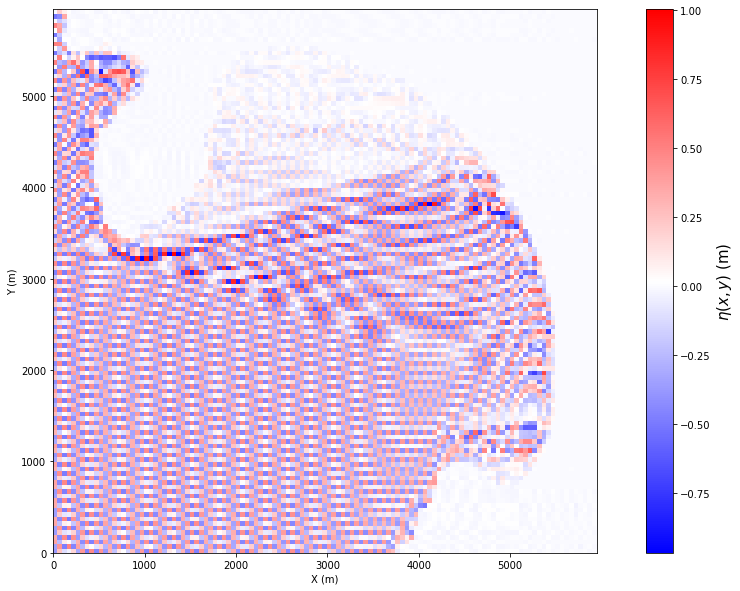

In [159]:
eta = np.loadtxt('eta.dat')

print(np.shape(eta))
alto  = 10
ancho = 17.5
fig = plt.figure(figsize=(ancho, alto))

plt.pcolormesh(X,Y,eta.T,cmap='bwr')
cbar = plt.colorbar()
cbar.ax.set_ylabel('$\eta (x,y)$ (m)',fontsize=15)
plt.gca().set_aspect('equal')
#plt.xlim(0,495)
plt.xlabel('X (m)')
plt.ylabel('Y (m)')
plt.show()

In [ ]:
y

array([  0.,   5.,  10.,  15.,  20.,  25.,  30.,  35.,  40.,  45.,  50.,
        55.,  60.,  65.,  70.,  75.,  80.,  85.,  90.,  95., 100., 105.,
       110., 115., 120., 125., 130., 135., 140., 145., 150., 155., 160.,
       165., 170., 175., 180., 185., 190., 195., 200., 205., 210., 215.,
       220., 225., 230., 235., 240., 245., 250., 255., 260., 265., 270.,
       275., 280., 285., 290., 295., 300., 305., 310., 315., 320., 325.,
       330., 335., 340., 345., 350., 355., 360., 365., 370., 375., 380.,
       385., 390., 395., 400., 405., 410., 415., 420., 425., 430., 435.,
       440., 445., 450., 455., 460., 465., 470., 475., 480., 485., 490.,
       495.])

In [ ]:
@np.vectorize
def disper(T,h,delta_c=0.00001,tol=1e-7):
  #constante
  g = 9.81 #m/s2
  f = 1/T
  C = np.sqrt(g*h)
  for i in range(50):
    k = 2*np.pi*f/C
    C = np.sqrt((g/k)*np.tanh(k*h))
    if delta_c*k/(2*np.pi*f) <= tol:
      break
  return C

In [ ]:
T = 8
w = 2*np.pi/T
C = disper(T,h)
k = w/C

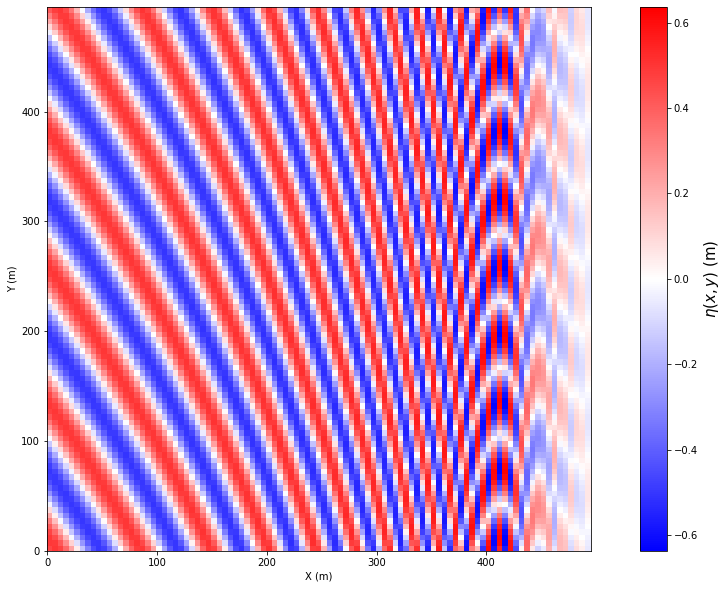

In [ ]:
wave = (H/2)*np.cos((k*np.cos(np.pi*angle/180)*X.T) + (k*np.sin(np.pi*angle/180)*Y.T) - (w*0.5) )

alto  = 10
ancho = 17.5
fig = plt.figure(figsize=(ancho, alto))

plt.pcolormesh(X,Y,wave.T,cmap='bwr')
cbar = plt.colorbar()
cbar.ax.set_ylabel('$\eta (x,y)$ (m)',fontsize=15)
plt.gca().set_aspect('equal')
plt.xlim(0,495)
plt.xlabel('X (m)')
plt.ylabel('Y (m)')
plt.show()

In [137]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.io as sio
datos = sio.loadmat('Quintero.mat')

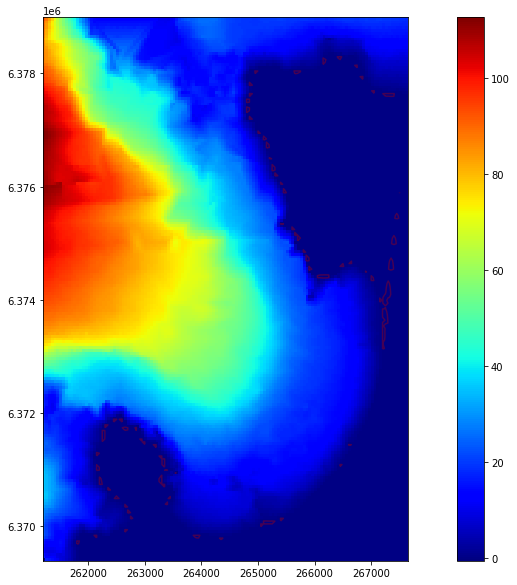

In [138]:
x = datos['XI']
y = datos['YI']

dx = np.diff(x)[0][0]
dy = np.diff(y)[0][0]

Grilla = -datos['ZI']
X,Y = np.meshgrid(x,y)

alto  = 10
ancho = 17.5
fig = plt.figure(figsize=(ancho, alto))

plt.pcolormesh(X,Y,Grilla,cmap='jet')
plt.colorbar()
plt.contour(X,Y,Grilla,[-0.001])

plt.gca().set_aspect('equal')
plt.show()

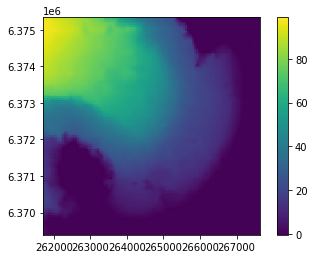

(120, 120)
-0.5047723733294548


In [139]:
np.shape(Grilla[0:100,0:100])
plt.pcolormesh(X[0:120,10:130],Y[0:120,10:130],Grilla[0:120,10:130])
plt.colorbar()
plt.contour(X[0:120,10:130],Y[0:120,10:130],Grilla[0:120,10:130],[-0.001])
plt.gca().set_aspect('equal')
plt.show()
print(np.shape(Grilla[0:120,10:130]))
print(np.min(Grilla[0:120,10:130]))

Grilla_REFDIF = Grilla[0:120,10:130]
Grilla_REFDIF = Grilla_REFDIF.T
Grilla_REFDIF = Grilla_REFDIF.reshape(int(120*120/20),20)


In [140]:
np.shape(Grilla_REFDIF)

a = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
mat = np.matrix(Grilla_REFDIF)
with open('quintero.dat','wb') as f:
    for line in mat:
        np.savetxt(f, line, fmt='%9.4f')
